# **Trabalho Prático 2 (IACD) - 2024/2025**
### "Projeto: Sistema de Intervenção Estudantil"

Visita a nossa app: [STREAMLIT](https://amarcos20.streamlit.app) ou no nosso repositorio [GITHUB](https://github.com/amarcos20/app_streamlit).

Trabalho realizado por: **Afonso Marcos** (202404088), **Afonso Silva** (202406661), **Pedro Afonso** (202404125)

---
---

# **Índice**
#### 1. **Introdução**
#### 2. **Bibliotecas utilizadas**
#### 3. **Formulação do problema**
- 3.1. Objetivo
- 3.2. Justificação
- 3.3. Dataset
#### 4. **Exploração de dados**
- 4.1. Notas
- 4.2. Observações Gerais
- 4.3. Identificação de Features Discriminatórias
    - 4.3.1. Hipótese 1 - Consumo de Álcool
    - 4.3.2. Hipótese 2 - Relacionamento Amoroso
    - 4.3.3. Hipótese 3 - Apoio Escolar 
#### 5. **Data Cleaning and Pre-processing**
- 5.1. Identificação de Constantes
- 5.2. Preparação da variável alvo
- 5.3. Seleção das features (X)
- 5.4. Identificação automática de tipos de colunas para processamento em X
- 5.5. Divisão dos dados em conjunto de treino e teste
- 5.6. Configuração do ColumnTransformer
- 5.7. Aplicação das Transformações
- 5.8. Reconstrução dos DataFrames Processados
- 5.9. Armazenamento dos Dados Processados
#### 6. **Data Modeling (Supervised Learning)**
- 6.1. Definição de Constantes e Carregamento dos Dados Processados
- 6.2. Preparação dos Conjuntos de Treino e Teste (X,y)
- 6.3. Definação da Função de Avaliação e Baseline
- 6.4. Experimentação Inicial com Diferentes Algoritmos (Validação Cruzada no Treino)
- 6.5. Seleção dos Modelos Mais Promissores e Treino/ Avaliação Conjunto de Teste
- 6.6. Otimização de Hiperparâmetros (GridSearchCV) Para os Melhores Modelos
- 6.7. Comparação Final dos Modelos e Interpretação
    - 6.7.1. Interpretação dos resultados
    - 6.7.2. Guardar o Melhor Modelo e outros
#### 7. **Sugestões de Próximos Passos e Potenciais Melhorias**
---
---

# 1. **Introdução**

[[Voltar ao índice]](#índice)

A utilização de técnicas de _Machine Learning_ tem sido cada vez maior, ganhando bastante relevância como ferramenta de apoio em diversas áreas, podendo dar apoio, por exemplo, dentro do ramo da educação, na gestão pedagógica e na promoção do sucesso escolar. A capacidade de prever o desempenho dos estudantes, através de dados históricos e demográficos, permite não só antecipar dificuldades, mas também implementar medidas de intervenção mais eficazes.

Neste projeto, propõe-se a abordagem de um caso real desta ciência, incluindo a análise exploratória, limpeza e transformação dos dados, avaliação dos modelos de previsão, inspeção visual e comunicação dos resultados, com base no _dataset_ 'student-data.csv', que contém informações sobre alunos do ensino secundário em Portugal. Desta forma, foi construída uma pipeline de _Machine Learning_, capaz de prever se um aluno irá, ou não, reprovar no exame final, de acordo com características, como faltas, ambiente familiar, hábitos de estudo, entre outros.

---
---

# 2. **Bibliotecas importadas para a realização do trabalho**
[[Voltar ao índice]](#índice)

In [48]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import os 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
# Modelos de Classificação para a terceira tarefa
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Para o devido funcionamento e visualização deste projeto, é recomendado utilizar o Anaconda Python Distribution, pois permite acessar a várias biliotecas Python utilizadas neste sistema.  
  
As principais bibliotecas utilizadas são:
- **Numpy**: permite realizar uma grande variedade de operações matemáticas em arrays e matrizes.
- **Pandas**: facilita a análise, manipulação e estruturação eficientes dos dados.
- **Scikit-learn**: disponibiliza ferramentas simples e eficazes para a previsão de resultados com base em dados.
- **Matplotlib**: utilizado para criar gráficos e visualizar os dados de forma detalhada.
- **Seaborn**: fornece uma interface de alto nível, permitindo criar visualizações estatísticas complexas de forma simples, complementando o Matplotlib.


---
---

# 3. **Formulação do Problema**

[[Voltar ao índice]](#índice)

Este trabalho tem como objetivo principal desenvolver um sistema de intervenção estudantil, capaz de prever se um aluno irá ou não passar no exame final, com base no _dataset_ do 'student-data.csv' fornecido. Nesse sentido, foi feita incialmente uma análise exploratória dos dados do _dataset_ em questão e, de seguida, foram aplicados em modelos de _Supervised Learning_ para a classificação dos dados e respetiva avaliaçãode performance. Quanto aos dados fornecidos, podem ser divididos nas seguintes categorias:

- **_Categóricos_**:  
  **school**(`GP` ou `MS`),  
  **sex**(`F` ou `M`),  
  **adress**(`U` ou `R`),  
  **famsize**(`LE3` ou `GT3`);  
  **Pstatus**(`T` ou `A`),  
  **Mjob**(`teacher`, `health`, `services`, `at_home` ou `other`),  
  **Fjob**(`teacher`, `health`, `services`, `at_home` ou `other`),  
  **reason**(`home`, `reputation`, `course` ou `other`),  
  **guardian**(`mother`, `father` ou `other`).  

- **_Numéricos_**:  
  **age**, **Medu**, **Fedu**, **traveltime**, **studytime**, **failures**,  
  **famrel**, **freetime**, **goout**, **Dalc**, **Walc**, **health**, **absences**.

- **_Booleanos_**:   
  **schoolsup**, **famsup**, **paid**, **activities**, **nursery**,  
  **higher**, **internet**, **romantic**, **passed**.


###### Os dados apresentados como 'Booleanos' são na verdade expressos como 'yes' ou 'no' invés de 'True' ou 'False'. Além disso, todas as categorias podem conter valores omissos que deverão ser tratados no pré-processamento.
###### Por fim, visto que estamos a realizar uma 'classificação', podemos comprovar o quão precisos foram os resultados de modo a avaliar a eficácia dos métodos usados.

Através da criação de um _pipeline_ completo de _Machine Learning_, pretende-se automatizar a identificação das principais _features_ que podem causar a reprovação de um aluno, permitindo adotar medidas pedagógicas que mudem este panorama.

---
## 3.1. **Objetivo**
O principal objetivo é criar um classificador binário que, mediante dados sobre o perfil do aluno, **preveja a variável _passed_**, que assume os valores:
- _'yes'_: o aluno passou no exame final;
- _'no'_: o aluno reprovou no exame final.



Paralelamente à construção do modelo de previsão, o trabalho tem também como finalidade a **identificação de padrões e condições problemáticas associadas à reprovação**. Através de uma análise exploratória dos dados, pretende-se reconhecer **fatores de risco** que possam servir de base para intervenções pedagógicas e estratégias de apoio ao sucesso educativo.

Este duplo objetivo: **prever a situação final** e **compreender os fatores subjacentes ao insucesso escolar**; contribui para uma abordagem mais completa e orientada à **tomada de decisão informada** por parte de instituições de ensino e agentes educativos.



---
## 3.2. **Justificação**
A possibilidade de antever o sucesso, ou não, de um aluno, tendo em conta um conjunto de dados anteriormente recolhido, pode ser bastante benéfica. Desta forma, esta prevsão permite que o plano de ensino, a disponibilização de recursos, o apoio individualizado e a redução do abandono escolar sejam diretamente impactadas, através desta análise prévia informada. Ainda, este sistema pode ser implementado em plataformas escolares que, ao detetar sinais de possível reprovação, emitem alertas prévios, permitindo apoiar decisões pedagócias mais eficazes e direcionadas.

---
## 3.3. **Dataset**
O _dataset_ usado contém dados de 395 estudantes, incluindo:
- Atributos pessoais (ex.: idade, género, situação romântica);
- Contexto familiar (ex.: educação dos pais, apoio familiar);
- Comportamento social e tempo de estudo;
- Presenças, consumo de álcool, e resultados académicos.

---
---

# 4. **Exploração dos dados**

[[Voltar ao índice]](#índice)

Esta etapa destina-se à análise dos dados do `dataset`. O seu principal objetivo passa por várias etapas: identificação de erros, da relevância dos dados recolhidos, sujeitos, inicialmente, a identificação e, posteriormente a retificações ou eliminações. Quantos às informações recolhidas

---
### 4.1. **Notas**

Para o devido funcionamento, o ficheiro csv deve estar no mesmo diretório que este documento Jupyter.  
Após a criação do dataframe _'data'_, é possível analisar e retirar as informações do dataset (através do comando _data.info()_). Nessas informações, está incluído: número, nome e tipo (_int_,_object_, entre outras) das _features_; dimensões e espaço usado no dataframe.

In [49]:
# Leitura do ficheiro
data = pd.read_csv('student-data.csv')

---

### 4.2. **Observações Gerais**

In [50]:
data.shape

(395, 31)

Com o comando "shape", é possível verificar que, no total, existem 395 alunos e 31 _features_ sobre cada um.

In [51]:
idade_media = round(data["age"].mean(),1)
print(idade_media)

16.7


Média de idade dos alunos.

In [52]:
features = []
for feature in data:
    features.append(feature)
print(features)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


Lista com todas as _features_ do _dataset_.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Resumo conciso e informativo sobre a estrutura do _DataFrame_. Esta função é essencial para uma compreensão inicial dos dados, permitindo identificar rapidamente características estruturais importantes, como, por exemplo, a presença de valores em falta, os tipos de dados associados a cada variável e a cardinalidade das features.

In [54]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


Através do comando "head()", é possível obter uma simplificação da estrutura geral do ficheiro, através da pré-visualização das primeiras 5 linhas do _dataset_. Ainda, verifica-se vários tipos de dados identificados (categóricos, numéricos, binários, etc.).

In [55]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


O comando "tail()" permite realizar o mesmo que o comando "head()", só que para as últimas 5 linhas do _dataset_.

In [56]:
print("\n--- Número e tipos de Valores  por Coluna ---")
for col in data.columns:
        num_unique = data[col].nunique()
        unique_values = data[col].unique()
        try:
            # para melhor legibilidade
            sorted_unique_values = np.sort(unique_values)
            # Formata os valores como string separados por vírgula
            values_str = ', '.join(map(str, sorted_unique_values))
        except TypeError: # Se não der para ordenar (tipos mistos)
            values_str = ', '.join(map(str, unique_values))
        print(f"{col}: {num_unique} ({values_str})")


--- Número e tipos de Valores  por Coluna ---
school: 2 (GP, MS)
sex: 2 (F, M)
age: 8 (15, 16, 17, 18, 19, 20, 21, 22)
address: 2 (R, U)
famsize: 2 (GT3, LE3)
Pstatus: 2 (A, T)
Medu: 5 (0, 1, 2, 3, 4)
Fedu: 5 (0, 1, 2, 3, 4)
Mjob: 5 (at_home, health, other, services, teacher)
Fjob: 5 (at_home, health, other, services, teacher)
reason: 4 (course, home, other, reputation)
guardian: 3 (father, mother, other)
traveltime: 4 (1, 2, 3, 4)
studytime: 4 (1, 2, 3, 4)
failures: 4 (0, 1, 2, 3)
schoolsup: 2 (no, yes)
famsup: 2 (no, yes)
paid: 2 (no, yes)
activities: 2 (no, yes)
nursery: 2 (no, yes)
higher: 2 (no, yes)
internet: 2 (no, yes)
romantic: 2 (no, yes)
famrel: 5 (1, 2, 3, 4, 5)
freetime: 5 (1, 2, 3, 4, 5)
goout: 5 (1, 2, 3, 4, 5)
Dalc: 5 (1, 2, 3, 4, 5)
Walc: 5 (1, 2, 3, 4, 5)
health: 5 (1, 2, 3, 4, 5)
absences: 34 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 38, 40, 54, 56, 75)
passed: 2 (no, yes)


A análise da cardinalidade permite identificar quantos valores distintos existem em cada coluna. Esta informação é útil para distinguir variáveis categóricas e numéricas, e para preparar adequadamente os dados para etapas futuras de processamento e modelação.

In [57]:
print("\n--- Contagem de Valores Ausentes por Coluna ---")
missing_values = data.isnull().sum()
print(missing_values)
print(f"\n--- Total de Valores Ausentes no Dataset: {missing_values.sum()} ---")
# Se houver muitos valores ausentes (>0), investigar mais a fundo depois.


--- Contagem de Valores Ausentes por Coluna ---
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

--- Total de Valores Ausentes no Dataset: 0 ---


Esta etapa consiste no cálculo e exibição do número exato de valores ausentes (NaN/ nulos) em cada coluna do _dataset_. A identificação explícita desses valores é fundamental para avaliar a qualidade dos dados e definir estratégias de tratamento apropriadas, como inserção, remoção ou exclusão de variáveis com elevada proporção de dados em falta.
Como, no _dataset_ em questão, não se verificam valores em falta, não será necessário proceder a técnicas de preenchimento ou eliminação de entradas incompletas nesta fase da análise.

In [58]:
# Para colunas numéricas (int, float)
print("\n--- Estatísticas Descritivas (Colunas Numéricas)  ---")
print(data.describe())


--- Estatísticas Descritivas (Colunas Numéricas)  ---
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013

Foram geradas estatísticas descritivas para as variáveis numéricas do _dataset_, incluindo média, desvio padrão, valores mínimos e máximos, bem como os quartis. Esta análise permite obter uma visão geral da distribuição dos dados, identificar possíveis _outliers_, como no caso da variável _"absences"_, e compreender o comportamento central de cada atributo.

In [59]:
print("\n--- Estatísticas Descritivas (Colunas Categóricas/Object) ---")
# O include='object' retorna strings. 
print(data.describe(include='object'))


--- Estatísticas Descritivas (Colunas Categóricas/Object) ---
       school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     395     395     395    395    395     395      395   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     307     281     354    141    217     145      273   

       schoolsup famsup paid activities nursery higher internet romantic  \
count        395    395  395        395     395    395      395      395   
unique         2      2    2          2       2      2        2        2   
top           no    yes   no        yes     yes    yes      yes       no   
freq         344    242  214        201     314    375      329      263   

       passed  
count     395  
unique      2  
top       yes  
freq      265  


Foram geradas estatísticas descritivas para as colunas categóricas com data.describe(include='object'). Esta função permite observar o número de valores não nulos, a quantidade de categorias distintas, a categoria mais comum e a sua frequência.  
No dataset em análise, observa-se, por exemplo, que a maioria dos alunos pertence à escola “GP” e que o género mais frequente é o feminino (“F”).

In [60]:

print("\n--- Distribuição da Variável Alvo ('passed') ---")
print(data['passed'].value_counts())
print("\n--- Distribuição Percentual da Variável Alvo ('passed') ---")
print(data['passed'].value_counts(normalize=True) * 100)


--- Distribuição da Variável Alvo ('passed') ---
passed
yes    265
no     130
Name: count, dtype: int64

--- Distribuição Percentual da Variável Alvo ('passed') ---
passed
yes    67.088608
no     32.911392
Name: proportion, dtype: float64


A variável alvo _passed_ representa se o aluno foi aprovado ou não. A análise inicial mostra que cerca de 67% dos alunos foram aprovados, enquanto 33% não o foram. Esta distribuição indica um ligeiro desequilíbrio entre as classes, o que poderá influenciar a escolha de métricas e técnicas nos modelos de previsão.

---

### 4.3. **Identificação de _features_ discriminatórias**
Seguem-se alguns gráficos que visam representar visualmente a informação disponibilizada pelo _dataset_, antes de ser realizado o pré-processamento dos dados. O objetivo é identificar  as _features_ que mais contribuem para prever se um aluno será aprovado ou não.

Sendo intuitivo considerar que a elevada taxa de faltas constitui uma das principais causas de reprovação, propõe-se a seguir uma análise da relação entre o número de faltas e de aprovações, de forma a verificar se esta hipótese se confirma.

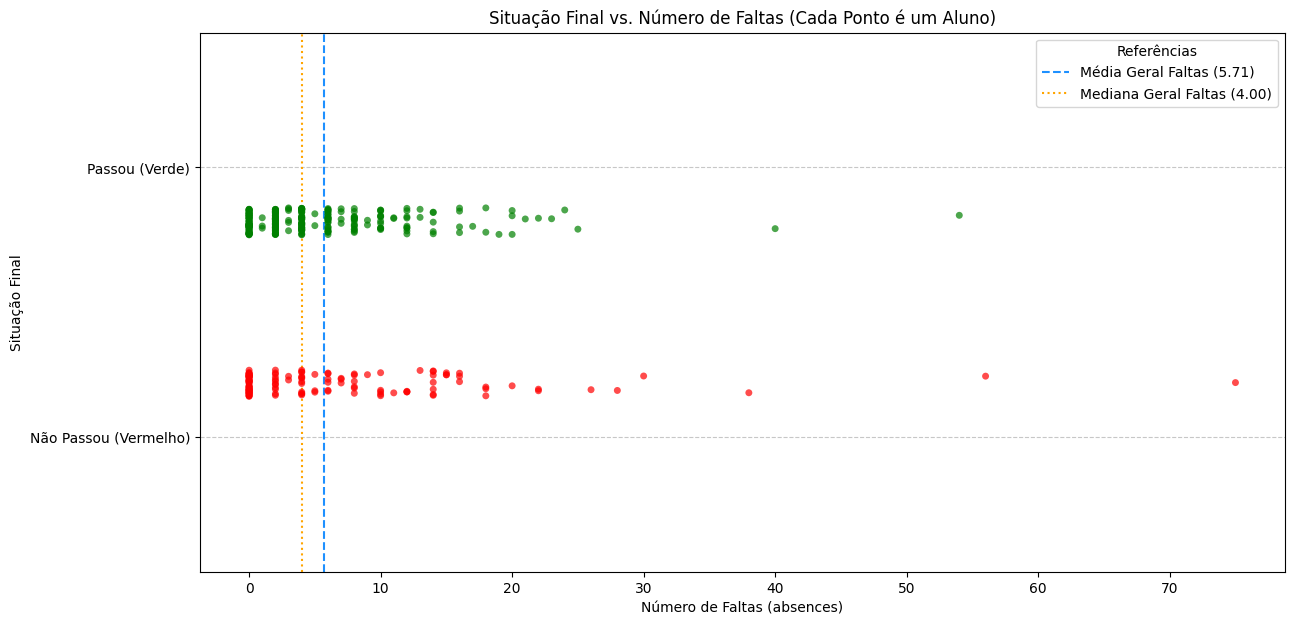


--- Média e Mediana de Faltas por Grupo ---
            mean  median
passed                  
no      6.761538     4.0
yes     5.192453     4.0


In [61]:
# Define o mapeamento de cores
color_map = {'yes': 'green', 'no': 'red'}

plt.figure(figsize=(14, 7)) # Um pouco mais largo para espalhar os pontos

# Usar stripplot para visualizar pontos individuais
# Jitter=True adiciona uma pequena dispersão horizontal para evitar sobreposição perfeita
sns.stripplot(
    x='absences',
    y='passed',        
    data=data,
    hue='passed',       #detalhes visuais para melhorar a visulaização
    dodge=True,         
    palette=color_map, 
    order=['yes', 'no'],
    jitter=0.1,        
    alpha=0.7,         
    size=5             
)

# Adicionar linhas de Média e Mediana Geral de Faltas como referência
mean_absences = data['absences'].mean()
median_absences = data['absences'].median()
plt.axvline(mean_absences, color='dodgerblue', linestyle='--', label=f'Média Geral Faltas ({mean_absences:.2f})')
plt.axvline(median_absences, color='orange', linestyle=':', label=f'Mediana Geral Faltas ({median_absences:.2f})')

# Ajustes do gráfico
plt.title('Situação Final vs. Número de Faltas (Cada Ponto é um Aluno)')
plt.xlabel('Número de Faltas (absences)')
plt.ylabel('Situação Final')
plt.yticks([0, 1], ['Passou (Verde)', 'Não Passou (Vermelho)']) # Melhora rótulos do eixo Y

# Adicionar grid horizontal para separar melhor as categorias
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar a legenda
# O stripplot pode criar uma legenda por padrão, mas podemos querer apenas as linhas verticais
handles, labels = plt.gca().get_legend_handles_labels()
# Filtra para manter apenas as legendas das linhas verticais (axvline)
line_labels = {label: handle for handle, label in zip(handles, labels) if 'Média' in label or 'Mediana' in label}
plt.legend(line_labels.values(), line_labels.keys(), title="Referências")


plt.show()

# Opcional: Ver média/mediana de faltas por grupo
print("\n--- Média e Mediana de Faltas por Grupo ---")
print(data.groupby('passed')['absences'].agg(['mean', 'median']))

#### _Conclusão da Relação entre Faltas e Situação Final dos Alunos_
A análise gráfica e estatística dos dados permite observar uma correlação significativa entre o número de faltas e a situação final dos alunos.

De forma geral, verificam-se os seguintes padrões:
- **Alunos aprovados** (Verde): tendem a apresentar um número baixo de faltas, principalmente abaixo das 10-15 faltas. A maioria destes alunos encontra-se abaixo da média geral de faltas (≈ 5,71) e da mediana (4,00). Contudo, existem certas exceções como casos de aprovação com um número elevado de faltas (superior a 30).

- **Alunos reprovados** (Vermelho): estes alunos para além de apresentarem uma média de faltas mais elevada, exibem uma maior dispersão no número de faltas. Apesar de existirem casos de reprovação com poucas ou nenhumas faltas, o que sugere a influência de outros fatores, como o desempenho em avaliações, não mostrados neste gráfico, observa-se uma tendência clara: valores mais elevados de faltas estão fortemente associados à reprovação. Através do gráfico, é possível perceber que a maioria dos alunos com mais de 25 a 30 faltas foram reprovados.

As linhas de referência presentes no gráfico (média e mediana) ajudam a contextualizar os dados, mas a acumulação de faltas muito acima desses valores é o fator que distingue, com maior clareza, os alunos que não atingiram os critérios mínimos para aprovação.  

Assim, apesar do número de faltas não ser o único fator determinante para o sucesso académico, os dados sugerem que se trata de um fator relevante, sobretudo quanto aos valores extremos.

#### _Análise das Causas Associadas ao Número de Faltas_

Após verificar uma influência negativa do número de faltas na taxa de aprovação dos alunos, torna-se pertinente apurar as principais causas que contribuem para as faltas dos estudantes. Para esse fim, será utilizada uma visualização do tipo `Blox plot` para as faltas "_absences_", que permitirá analisar a distribuição das faltas em relação a outras variáveis relevantes.

/tmp/ipykernel_69789/3870577810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['absences'], palette='viridis')


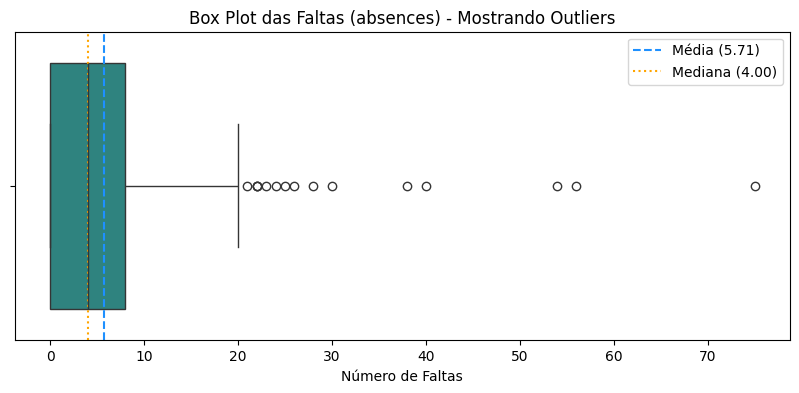


DataFrame 'outliers_and_failed' (Exibição completa):
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
276     GP   F   18       R     GT3       A     3     2     other  services   
183     GP   F   17       U     LE3       T     3     3     other     other   
307     GP   M   19       U     GT3       T     4     4   teacher  services   
280     GP   M   17       U     LE3       A     4     1  services     other   
205     GP   F   17       U     GT3       T     3     4   at_home  services   
103     GP   F   15       U     GT3       T     3     2  services     other   
216     GP   F   17       U     GT3       T     4     3     other     other   
277     GP   M   18       U     GT3       T     4     4   teacher  services   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
276        home   mother           2          2         0        no     no   
183  reputation   mother           1          2         0        no    yes   


In [62]:
plt.figure(figsize=(10, 4)) 

# Criar o Box Plot para 'absences'
# Usar x= para um box plot horizontal, que pode ser melhor para visualizar
# outliers numa escala ampla como a de faltas.
sns.boxplot(x=data['absences'], palette='viridis')

plt.title('Box Plot das Faltas (absences) - Mostrando Outliers')
plt.xlabel('Número de Faltas')
#plt.ylabel('') # Não necessário para boxplot horizontal de uma variável

# Adicionar linhas de Média e Mediana para referência (opcional no boxplot)
mean_absences = data['absences'].mean()
median_absences = data['absences'].median()
plt.axvline(mean_absences, color='dodgerblue', linestyle='--', label=f'Média ({mean_absences:.2f})')
plt.axvline(median_absences, color='orange', linestyle=':', label=f'Mediana ({median_absences:.2f})')
plt.legend()

plt.show()

# Opcional: Imprimir os valores considerados outliers pelo critério do boxplot (aproximado)
q1 = data['absences'].quantile(0.25)
q3 = data['absences'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Filtrar o DataFrame original para obter apenas os outliers em 'absences'
outliers_absences = data[(data['absences'] < lower_bound) | (data['absences'] > upper_bound)].copy()
# Usar .copy() para evitar SettingWithCopyWarning ao adicionar a coluna 'passed_mapped' depois

# print(f"\n--- Potenciais Outliers Identificados em 'absences' (Total: {len(outliers_absences)}) ---")
# Mostrar alguns exemplos de outliers gerais (ordenados por faltas, as 15 maiores)
# print(outliers_absences.sort_values('absences', ascending=False).head(15))

# --- Filtrar Outliers que Reprovaram ---
# Agora, dentro dos outliers, selecionar apenas aqueles onde 'passed' é 'no'
outliers_and_failed = outliers_absences[outliers_absences['passed'] == 'no'].copy()
print("\nDataFrame 'outliers_and_failed' (Exibição completa):")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outliers_and_failed.sort_values('absences', ascending=False))
# Usar .copy() novamente para esta nova filtragem

#print(f"\n--- Alunos Outliers em 'absences' QUE REPROVARAM ('passed' == 'no') (Total: {len(outliers_and_failed)}) ---")
# Mostrar o DataFrame com os alunos que são outliers e reprovaram
#print(outliers_and_failed.sort_values('absences', ascending=False)) # Mostrar todos, já que são poucos


#### _Análise de Casos Específicos: Alunos com Padrões Atípicos de Faltas_

Para além da análise geral da relação entre variáveis e a aprovação, é relevante identificar grupos de risco específicos de alunos que apresentam comportamentos atípicos e que reprovaram.

A partir do `Box plot` das faltas, foram identificados **pontenciais _outliers_**: alunos cujo número de faltas se encontra significativamente acima da média ou mediana, ultrapassando a dispersão observada na maioria da amostra.

Focando este grupo de alunos, analisou-se o seu desempenho final, tendo sido possível verificar que vários destes _outliers_ **não foram aprovados**. A lista correspondente a "Alunos Outliers em 'absences' que Reprovaram" destaca precisamente estes casos.

Este subconjunto representa um grupo de **alto risco**, combinando um comportamento atípico de faltas excessivas com o resultado final de reprovação. Tal perfil justifica uma atenção especial por parte de estruturas de apoio educativo, nomeadamente através de intervenções urgentes, direcionadas e personalizadas. A identificação das razões subjacentes às faltas excessivas, como problemas de saúde, contexto familiar adverso, ou desmotivação, deve orientar estratégias de mitigação adaptadas à realidade de cada aluno.

Adicionalmente, ao cruzar os dados dos _outliers_ com outras variáveis, observaram-se dois fatores com maior incidência entre os casos de reprovação com faltas elevadas:  
- O consumo de álcool nos fins de semana (`walc >= 3`)
- A existência de um relacionamento amoroso (`romantic = yes`)  
- O apoio disponibilizado pela escola nos estudos (`schoolsup = no`)

Esta análise indica potenciais dimensões pessoais, familiares e do ambiente escolar que podem influenciar o comportamento escolar e justificam uma análise mais aprofundada, relativamente às políticas educativas de apoio social.

---

#### 4.3.1. Hipótese 1 - Consumo de álcool

Será analisado o impacto do consumo de álcool durante o fim de semana na taxa de aprovação dos alunos.

/tmp/ipykernel_69789/2153466852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados, x="Walc", y="approval_rate", palette="Blues")


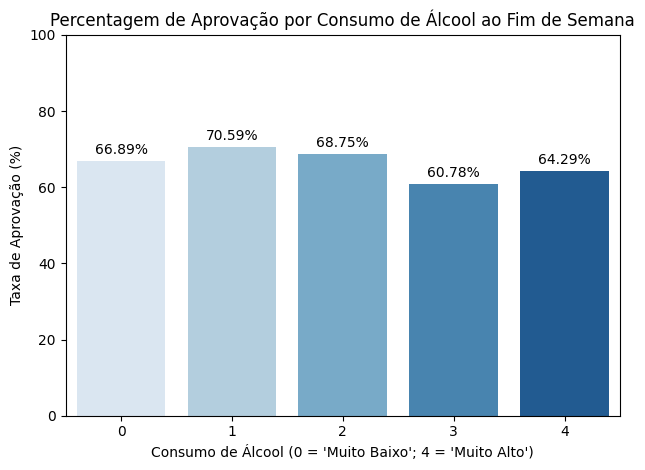

In [63]:
# Agrupar os dados por consumo de álcool ao fim de semana (Walc) e calcular a percentagem de aprovação
resultados = data.groupby("Walc")["passed"].apply(lambda x: (x == "yes").mean()).reset_index()

# Renomear colunas
resultados.columns = ["Walc", "approval_rate"]
resultados["approval_rate"] *= 100  # converter para percentagem

# Ordenar por nível de consumo (garantir que os níveis aparecem corretamente)
resultados = resultados.sort_values("Walc")

# Gráfico de barras
sns.barplot(data=resultados, x="Walc", y="approval_rate", palette="Blues")

plt.title('Percentagem de Aprovação por Consumo de Álcool ao Fim de Semana')
plt.ylabel("Taxa de Aprovação (%)")
plt.xlabel("Consumo de Álcool (0 = 'Muito Baixo'; 4 = 'Muito Alto')")
plt.ylim(0, 100)
plt.xticks(ticks=range(0, 5), labels=range(0, 5))  # força o eixo X a mostrar 0 a 4

# Mostrar valores no topo das barras
for index, row in resultados.iterrows():
    plt.text(x=index, y=row["approval_rate"] + 1, s=f'{row["approval_rate"]:.2f}%', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Observa-se uma variação considerável na taxa de aprovação entre os diferentes níveis de consumo de álcool ao fim de semana. Embora o grupo com consumo nível 1 apresente a maior taxa de aprovação (70,59%), verifica-se uma tendência decrescente na taxa de sucesso académico com o aumento do, com destaque para o nível 3, que apresenta apenas 60,78% de aprovação. No entanto, é importante referir que entre os níveis 2,3 e 4, as diferenças na taxa de aprovação são relativamente pequenas, o que indica que esta variável, quando analisada isoladamente, pode não ser suficientemente discriminatória para identificar alunos em risco.

Ainda assim, este padrão sugere que o consumo elevado de álcool ao fim de semana pode estar associado a um menor desempenho académico, possivelmente devido ao cansaço, falta de foco ou dificuldades cognitivas associadas ao consumo excessivo de substâncias. Esta variável, quando analisada isoladamente, revela-se como um fator de risco moderado, mas significativo, no percurso escolar dos alunos.

Assim, é recomendável desenvolver ações de prevenção e sensibilização, especialmente orientadas para os alunos que apresentam níveis mais elevados de consumo. Algumas medidas possíveis incluem:

- **Sessões de educação para a saúde**, com enfoque nos efeitos do consumo de álcool sobre a memória, a concentração e a performance escolar;

- **Campanhas de sensibilização**, conduzidas em colaboração com técnicos de saúde ou entidades externas, sobre os riscos físicos, emocionais e académicos do álcool;

- Integração do **tema nas aulas de Cidadania e Desenvolvimento**, promovendo o debate sobre estilos de vida saudáveis e escolhas conscientes;

- **Acompanhamento personalizado por parte dos serviços de psicologia e orientação escolar**, para alunos identificados com comportamentos de risco;

- **Parcerias com famílias**, incentivando uma maior comunicação e envolvimento parental relativamente aos hábitos dos alunos fora da escola.

Estas iniciativas podem contribuir para reduzir o impacto negativo do consumo de álcool no rendimento escolar, promovendo estilos de vida mais saudáveis e, consequentemente, um ambiente mais favorável à aprendizagem e ao sucesso académico.

---

#### 4.3.2. Hipótese 2 - Relacionamento amoroso
Será explorada a influência da existência de uma relação amorosa no desempenho académico dos estudantes.

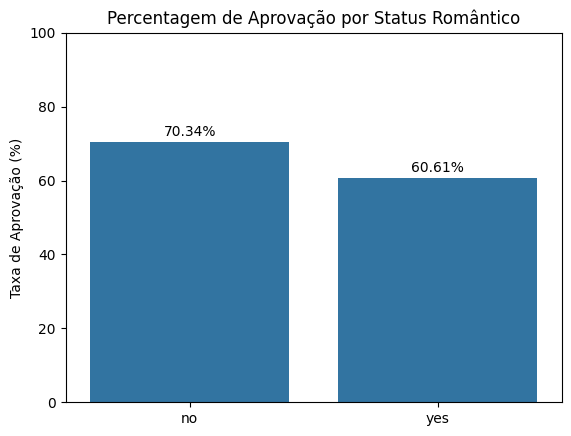

In [64]:
# Agrupar os dados por status romântico e calcular a percentagem de aprovação (passed == "yes")
resultados = data.groupby("romantic")["passed"].apply(lambda x: (x == "yes").mean()).reset_index()

#Renomear colunas
resultados.columns = ["romantic", "approval_rate"]
resultados["approval_rate"] *= 100

# Gráfico de barras
sns.barplot(data=resultados, x="romantic", y="approval_rate")
plt.title('Percentagem de Aprovação por Status Romântico')
plt.ylabel("Taxa de Aprovação (%)")
plt.xlabel("")
plt.ylim(0, 100)

# Display do valor de percentagem em cima de cada barra
for index, row in resultados.iterrows():
    plt.text(x=index, y=row["approval_rate"] + 1, s=f'{row["approval_rate"]:.2f}%', 
             ha='center', va='bottom')

plt.show()


Observa-se uma diferença significativa na taxa de aprovação entre os grupos analisados, cerca de 10%. Isso sugere que o status romântico dos estudantes possui uma relação forte com a reprovação ou aprovação. Portanto, esta variável, isoladamente, parece ser um fator determinante no desempenho escolar.
Assim, é possível concluir que o relacionamento, na idade jovem, na grande maioria, pode ter um efeito negativo nos estudos. Pode ser interessante implementar ações de sensibilização para minimizar este efeito negativo através de algumas campanhas. Como medidas concretas, recomendam-se:

- **Sessões informativas ou workshops** sobre a gestão do tempo e a relação entre a vida pessoal e académica;

- **Serviços de psicologia na escola**, onde é possível abordar a maturidade emocional e o impacto dos relacionamentos na concentração e motivação;

- Integração dos **relacionamentos amorosos como tema nas aulas de Cidadania e Desenvolvimento**, promovendo a reflexão sobre as prioridades e a tomada de decisões conscientes.

Estas iniciativas podem contribuir para que os estudantes desenvolvam uma maior consciência sobre os efeitos dos seus vínculos emocionais no contexto académico e adotem estratégias mais saudáveis para gerir os seus compromissos.

---
#### 4.3.3. Hipótese 3 - Apoio escolar
Será examinada a relação entre a disponibilização de apoio escolar e a probabilidade de aprovação dos alunos.

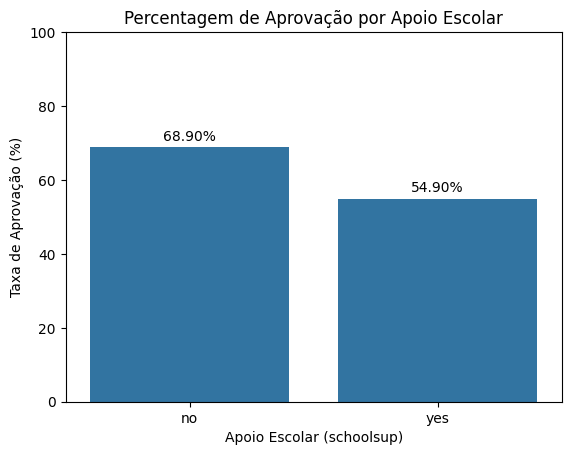

In [65]:
# Agrupar os dados por apoio escolar e calcular a percentagem de aprovação (passed == "yes")
resultados = data.groupby("schoolsup")["passed"].apply(lambda x: (x == "yes").mean()).reset_index()

# Renomear colunas
resultados.columns = ["schoolsup", "approval_rate"]
resultados["approval_rate"] *= 100  # converter para percentagem

# Gráfico de barras
sns.barplot(data=resultados, x="schoolsup", y="approval_rate")
plt.title('Percentagem de Aprovação por Apoio Escolar')
plt.ylabel("Taxa de Aprovação (%)")
plt.xlabel("Apoio Escolar (schoolsup)")
plt.ylim(0, 100)

# Mostrar valores no topo das barras
for index, row in resultados.iterrows():
    plt.text(x=index, y=row["approval_rate"] + 1, s=f'{row["approval_rate"]:.2f}%', 
             ha='center', va='bottom')

plt.show()

Curiosamente, os dados revelam que os alunos que beneficiam de apoio escolar (‘schoolsup’) apresentam uma taxa de aprovação inferior (54,9%) àqueles que não recebem esse tipo de apoio (68,9%).

Este resultado levanta questões importantes sobre a eficácia do apoio escolar atualmente implementado, sugerindo que ele pode não estar a cumprir plenamente o seu objetivo de promover o sucesso académico.

Uma possível explicação é que o apoio escolar é frequentemente direcionado a alunos com maiores dificuldades, o que, por si só, pode influenciar negativamente os resultados.

Contudo, a existência dessa diferença significativa de desempenho indica que o apoio prestado poderá estar a ser insuficiente, mal estruturado ou inadequado às necessidades reais dos estudantes.

É recomendável uma reavaliação do modelo de apoio escolar adotado, apostando em intervenções mais personalizadas, com maior foco nas causas profundas do insucesso, e com monitorização contínua da sua eficácia.

A eficácia do apoio escolar deve ser analisada em conjunto com outros fatores, como o contexto socioeconómico dos alunos, para garantir que as medidas de suporte são verdadeiramente equitativas e transformadoras.

Face a estes dados, torna-se essencial que as instituições de ensino invistam não apenas na existência do apoio, mas na sua qualidade, continuidade e impacto mensurável no desempenho académico.

- **Incentivo e ajuda** dos alunos que podem não encarar seriamente e desvalorizar estas ajudas valiosas deve ser reforçado e incentivado a bom uso desta ajuda;
- **Criação de planos de acompanhamento individualizados**, integrando psicólogos, professores e encarregados de educação;
- **Promoção de programas de mentoria entre pares**, onde alunos com bom desempenho apoiem colegas com dificuldades;
- **Divulgação e sensibilização junto da comunidade escolar** sobre a existência e importância do apoio escolar.

Estas iniciativas têm o potencial de não só melhorar o desempenho académico, como também promover o equilíbrio entre o acesso às oportunidades de sucesso escolares com os alunos em diferentes patamares de aprendizagem.

---
---

# 5. **Data Cleaning and Pre-processing**
[[Voltar ao índice]](#índice)

Antes da construção de qualquer modelo de previsão, é fundamental assegurar que os dados utilizados se encontram devidamente preparados. A qualidade e integridade dos dados têm um impacto direto na eficácia e robustez dos algoritmos de _Machine Learning_, sendo esta fase preliminar uma etapa crítica de todo o processo analítico.

Neste sentido, procedeu-se a uma análise exploratória, com base nas informações recolhidas na etapa anterior. Por vezes, recorreu-se a uma segunda verificação para garantir a consistência dos valores e a ausência de anomalias ou incoerências nos registos. Este processo envolveu a uniformização de categorias e a transformação de variáveis sempre que necessário, assegurando que estas se encontravam no formato adequado para os métodos de aprendizagem automática.

Já nesta fase, o objetivo principal é composto por duas partes:
- Garantir a fiabilidade dos resultados que serão obtidos na etapa seguinte;
- Aumentar o rigor das recomendações a apresentar à Direção da escola.
A preparação cuidadosa dos dados contribui para que o modelo final seja não apenas tecnicamente robusto, mas também útil e interpretável no contexto da tomada de decisão educativa.

---
### 5.1. **Definição de Constantes**

In [66]:
RAND_STATE = 12
TEST_SIZE = 0.1
INPUT_FILE = 'student-data.csv' # Assuming this is your concatenated file with 'passed' column
TRAIN_PROCESSED_FILE = 'train_processed.csv'
TEST_PROCESSED_FILE = 'test_processed.csv'
OUTPUT_DIR = 'data/processed/' # Define an output directory

Com o intuito de promover a clareza, organização e facilidade de implementação de funções/classes das bibliotecas `Scikit-Learn`, foram definidas, numa fase inicial, várias constantes essenciais que regulam o comportamento do processo de preparação e modelação dos dados.

Entre estas, destaca-se a constante `TEST_SIZE`, que determina a proporção dos dados reservada para a fase de validação do modelo. Neste projeto, optou-se por utilizar 10% do total dos dados para esse fim, assegurando uma avaliação fiável do desempenho do classificador em dados não vistos.

Adicionalmente, a constante `RAND_STATE` foi definida para garantir a capacidade de repetir os resultados. Através da fixação de uma semente aleatória, é possível garantir que a divisão entre conjuntos de treino e teste se mantém consistente em diferentes execuções do código, o que é essencial para a comparação objetiva de resultados e replicação do processo.

Foram também definidos os nomes dos ficheiros de entrada e de saída, tanto para os dados brutos como para os dados já processados. Esta abordagem facilita a organização do pipeline de trabalho, promovendo boas práticas de programação e facilitando a manutenção e partilha do projeto entre diferentes utilizadores ou equipas.

---
### 5.2. **Preparação da Variável Alvo**

In [67]:
if 'passed' in data.columns:
    print("Mapeando a coluna 'passed' para 'passed_mapped' (1 para 'yes', 0 para 'no').")
    data['passed_mapped'] = data['passed'].map({'yes': 1, 'no': 0})
    target_column_name = 'passed_mapped' # Nome da nossa coluna alvo numérica
else:
    print("Erro: A coluna 'passed' não foi encontrada no DataFrame 'data'. Não é possível definir o alvo.")
    exit() # Ou outra forma de tratamento de erro

# Verificar se o mapeamento resultou em NaNs (caso 'passed' tivesse outros valores)
if data[target_column_name].isnull().any():
    print(f"Atenção: Existem valores NaN na coluna '{target_column_name}' após o mapeamento.")
    print(f"Valores únicos em 'passed' original: {data['passed'].unique()}")
    data.dropna(subset=[target_column_name], inplace=True)
    print(f"Linhas com '{target_column_name}' NaN removidas. Novo shape de 'data': {data.shape}")

y = data[target_column_name]
print(f"Variável alvo '{target_column_name}' pronta. Distribuição:\n{y.value_counts(normalize=True)}")


Mapeando a coluna 'passed' para 'passed_mapped' (1 para 'yes', 0 para 'no').
Variável alvo 'passed_mapped' pronta. Distribuição:
passed_mapped
1    0.670886
0    0.329114
Name: proportion, dtype: float64


Para que o modelo de _Machine Learning_ possa realizar previsões eficazes, é essencial que a variável alvo ("_passed_", com valores "_yes_" ou "_no_") se encontre num formato numérico. Assim, os valores categóricos desta variável foram mapeados para os valores 1 e 0, respetivamente, criando-se uma nova coluna designada por `passed_mapped`.

Este processo permite que a variável esteja apta a ser interpretada pelos modelos de previsão, que apenas compreendem dados numéricos. Além disso, foram implementadas verificações adicionais para garantir a integridade do processo de conversão, nomeadamente:

- Confirmação da existência da coluna _passed_ no conjunto de dados;

- Tratamento de possíveis valores inválidos ou em falta, removendo linhas com valores nulos após o mapeamento;

- Validação da distribuição da nova variável alvo, sendo que, após o mapeamento, observa-se uma distribuição aproximadamente composta por 67% de alunos aprovados (valor 1) e 33% de alunos reprovados (valor 0).

Assim, garantir um pré-processamento rigoroso é fundamental para a qualidade das previsões que se pretendem obter mais adiante no projeto.

---
### 5.3. **Seleção de Features (X)**

In [68]:
cols_to_drop_for_X = ['passed', target_column_name]

# Garantir que estamos a tentar remover apenas colunas que de facto existem
# (embora 'passed' e target_column_name devam existir neste ponto)
actual_cols_to_drop_for_X = [col for col in cols_to_drop_for_X if col in data.columns]
X = data.drop(columns=actual_cols_to_drop_for_X)

print(f"\nFeatures (X) criadas. Shape: {X.shape}")
print("\nPrimeiras linhas de X:")
print(X.head())
print("\nInformações de X (tipos de dados das features):")
X.info() # Descomentar para verificar os tipos de dados em X


Features (X) criadas. Shape: (395, 30)

Primeiras linhas de X:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3    

As _features_ (ou características) representam as diferentes informações sobre os alunos que serão utilizadas pelo modelo de _Machine Learning_ para aprender padrões e realizar previsões. Neste caso, foram selecionadas 30 variáveis descritivas, relacionadas com o perfil, hábitos e contexto dos estudantes.

A variável `passed_mapped`, que indica se o aluno foi aprovado (1) ou não (0), foi separada das restantes variáveis. Desta forma, a nova variável X contém todos os atributos relevantes dos alunos sem incluir o resultado final, que constitui a variável alvo (y).

Esta separação é fundamental para garantir que o modelo apenas aprenda a prever a aprovação, de acordo com as informações disponíveis antes do resultado final, assegurando a validade do processo preditivo.

---
### 5.4. **Identificação Automática de Tipos de Colunas para Processamento em X**

In [69]:
numeric_cols_to_process = X.select_dtypes(include=np.number).columns.tolist()
nominal_cols_to_process = X.select_dtypes(include='object').columns.tolist()
print(f"\nColunas numéricas identificadas em X para processamento: {numeric_cols_to_process}")
print(f"Colunas nominais identificadas em X para processamento: {nominal_cols_to_process}")

# Verificar se alguma coluna ficou de fora (não é numérica nem 'object')
all_X_cols = X.columns.tolist()
identified_cols = numeric_cols_to_process + nominal_cols_to_process
unidentified_cols = [col for col in all_X_cols if col not in identified_cols]
if unidentified_cols:
    print(f"ATENÇÃO: As seguintes colunas em X não foram classificadas como numéricas nem 'object': {unidentified_cols}")
    print("Estas colunas serão descartadas pelo ColumnTransformer se 'remainder' for 'drop'.")


Colunas numéricas identificadas em X para processamento: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Colunas nominais identificadas em X para processamento: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


Como já foi referido anteriormente, as características dos alunos (variável X) incluem tanto variáveis numéricas, como a idade ou o número de faltas, como variáveis categóricas,como o género, a profissão dos encarregados de educação ou o acesso à internet em casa.

Para que os algoritmos de _Machine Learning_ funcionem corretamente, é fundamental que cada tipo de dado seja tratado de forma adequada. Assim, foi realizada uma distinção automática entre colunas numéricas e colunas nominais, ou seja, com valores de texto, permitindo aplicar transformações específicas a cada tipo. Este passo é essencial para garantir que os dados estejam no formato ideal para o processo de modelação de previsões.

---
### 5.5. **Divisão dos Dados em Conjuntos de Treino e Teste**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RAND_STATE, shuffle=True, stratify=y)
print(f"\nDados divididos em treino e teste.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Dados divididos em treino e teste.
X_train shape: (355, 30), y_train shape: (355,)
X_test shape: (40, 30), y_test shape: (40,)


Para garantir uma avaliação rigorosa e imparcial do desempenho do modelo de previsão, o _dataset_ foi dividido em dois subconjuntos distintos: 80% dos dados foram reservados para o treino do modelo, enquanto os 10% restantes foram utilizados para o teste. Esta abordagem permite simular o comportamento do modelo perante novos dados — ou seja, alunos que não “conheceu” durante o processo de aprendizagem.

A divisão foi realizada com a opção de stratification com base na variável alvo (y), de forma a assegurar que a proporção entre alunos aprovados e reprovados se mantivesse equilibrada em ambos os subconjuntos. Esta técnica é especialmente relevante dado o ligeiro desequilíbrio presente nos dados originais, permitindo uma avaliação mais fiável e representativa da capacidade preditiva do modelo.

---
### 5.6. **Configuração do `ColumnTransformer`** 

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols_to_process),
        ('cat', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False), nominal_cols_to_process)
    ],
    remainder='drop', # Descarta quaisquer colunas em X que não sejam numéricas ou 'object' (se houver)
    n_jobs=-1
)

Foi configurado um pipeline de pré-processamento utilizando a ferramenta `ColumnTransformer`, com o objetivo de automatizar e padronizar as transformações necessárias consoante o tipo de variável presente no conjunto de dados.

Para as variáveis numéricas, foi aplicado o `MinMaxScaler`, que transforma os valores para um intervalo entre 0 e 1. Esta normalização é essencial, uma vez que muitos algoritmos de _Machine Learning_ são sensíveis à escala dos dados e funcionam de forma mais eficiente quando todas as variáveis se encontram numa escala semelhante.

Já para as variáveis categóricas nominais, ou textuais, foi utilizado o `OneHotEncoder`, que converte essas categorias em representações numéricas binárias, tornando-as compatíveis com os algoritmos de aprendizagem automática. Por exemplo, a variável "sex", originalmente com os valores 'F' e 'M', será transformada em duas colunas (sex_F e sex_M) contendo os valores 0 ou 1. Para evitar redundâncias em variáveis binárias, foi utilizada a opção drop='if_binary', que elimina uma das colunas geradas automaticamente nesses casos, mantendo a informação completa e otimizando a representação dos dados.

Esta abordagem estruturada garante que todas as transformações são aplicadas de forma consistente e integrada, preparando os dados adequadamente para o treino do modelo.

---
### 5.7. **Aplicação das Transformações**

In [72]:
print("\nAplicando transformações de pré-processamento...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Transformações aplicadas.")


Aplicando transformações de pré-processamento...
Transformações aplicadas.


Após aplicar as transformações configuradas aos dados, é essencial garantir que todo o processo seja conduzido de forma rigorosa e metodológica. As transformações, como a normalização das variáveis numéricas com o `MinMaxScaler` e a codificação das variáveis categóricas com o `OneHotEncoder`, foram ajustadas apenas com base no conjunto de treino (fit_transform). Desta forma, evita-se a introdução de qualquer tipo de informação do conjunto de teste durante a fase de treino, preservando a imparcialidade da avaliação.

Em seguida, as mesmas transformações já aprendidas foram aplicadas ao conjunto de teste (transform), assegurando a coerência entre ambos os conjuntos. Esta separação é fundamental para que a avaliação do modelo reflicta fielmente o seu desempenho em novos dados, permitindo uma análise realista da sua capacidade preditiva em cenários futuros.

---
### 5.8. **Reconstrução dos DataFrames Processados**

In [73]:
try:
    nominal_col_names_processed = preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_cols_to_process)
except AttributeError:
    nominal_col_names_processed = preprocessor.named_transformers_['cat'].get_feature_names(nominal_cols_to_process)

# Nomes finais das colunas na ordem correta
final_feature_names = numeric_cols_to_process + list(nominal_col_names_processed)

# Criar DataFrames processados
train_df_processed = pd.DataFrame(X_train_processed, columns=final_feature_names, index=X_train.index)
train_df_processed[target_column_name] = y_train

test_df_processed = pd.DataFrame(X_test_processed, columns=final_feature_names, index=X_test.index)
test_df_processed[target_column_name] = y_test

print(f"\nDataFrames processados reconstruídos.")
print(f"Shape do treino processado: {train_df_processed.shape}")
print(f"Shape do teste processado: {test_df_processed.shape}")
# print("\nPrimeiras 5 linhas dos dados de treino processados:")
# print(train_df_processed.head())



DataFrames processados reconstruídos.
Shape do treino processado: (355, 44)
Shape do teste processado: (40, 44)


Após as transformações, os dados estão agora num formato numérico pronto para o Machine Learning. Reorganizamos estes dados transformados de volta em DataFrames pandas (train_df_processed e test_df_processed) com os nomes corretos para cada feature (incluindo as novas colunas criadas pelo One-Hot Encoding). Adicionamos a variável alvo (passed_mapped) de volta a estes DataFrames para facilitar a próxima etapa.


Após as transformações, os dados encontram-se agora num formato numérico adequado para os algoritmos de _Machine Learning_. Para facilitar a manipulação e interpretação futura, os dados transformados foram reorganizados sob a forma de _DataFrames_ do pandas (`train_df_processed` e `test_df_processed`) com os nomes corretos atribuídos a cada _feature_, incluindo as novas colunas geradas durante o processo de One-Hot Encoding.

Além disso, a variável alvo (passed_mapped) foi reintegrada em ambos os conjuntos, garantindo que os dados estejam prontos para a fase seguinte de modelação de previsão. Esta estrutura organizada permite um acompanhamento mais claro de cada observação e facilita, tanto a análise exploratória, como a avaliação dos resultados dos modelos.

---
### 5.9. **Armazenamento dos Dados Processados**

In [74]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_path = os.path.join(OUTPUT_DIR, TRAIN_PROCESSED_FILE)
test_path = os.path.join(OUTPUT_DIR, TEST_PROCESSED_FILE)

train_df_processed.to_csv(train_path, index=False)
test_df_processed.to_csv(test_path, index=False)

print(f"\nDados processados guardados em:")
print(f"Treino: {train_path}")
print(f"Teste: {test_path}")



Dados processados guardados em:
Treino: data/processed/train_processed.csv
Teste: data/processed/test_processed.csv


Por fim, os conjuntos de de dados treino e teste já pré-processados foram guardados em ficheiros CSV distintos. Esta etapa tem como objetivo facilitar futuras análises e testes, permitindo que os dados sejam carregados diretamente para a fase de modelação, sem necessidade de repetir todo o processo de limpeza e transformação.

Ao manter estes ficheiros organizados e prontos para uso, asseguramos maior eficiência, consistência e facilidade de repetição ao longo do desenvolvimento do sistema de previsão. Esta prática é especialmente útil quando se pretende testar diferentes algoritmos ou ajustar parâmetros, uma vez que garante que os dados utilizados permanecem sempre os mesmos em todas as tentativas.

---
---

# 6. **Data Modeling (Supervised Learning)**
[[Voltar ao índice]](#índice)

Concluído o pré-processamento dos dados, procede-se à fase de modelação, recorrendo a algoritmos de aprendizagem supervisionada. Este paradigma de aprendizagem automática baseia-se na utilização de um conjunto de dados identificados, onde as variáveis explicativas (_features_) estão associadas a um resultado conhecido (variável alvo), permitindo ao modelo aprender as relações subjacentes entre os atributos e os resultados esperados.

A finalidade desta etapa consiste na construção de modelos de previsão capazes de generalizar o conhecimento adquirido e realizar previsões fiáveis sobre novos dados. Para tal, serão aplicados e comparados diferentes algoritmos, avaliando-se o seu desempenho com base em métricas adequadas, assegurando uma análise rigorosa e a seleção da abordagem mais eficaz para o problema em estudo.

---
### 6.1. **Definição de Constantes e Carregamento dos Dados Processados**

In [75]:
RAND_STATE = 12
TRAIN_PROCESSED_FILE = 'data/processed/train_processed.csv' # Ajusta o nome se necessário
TEST_PROCESSED_FILE = 'data/processed/test_processed.csv'  # Ajusta o nome se necessário
TARGET_COLUMN = 'passed_mapped' # O nome da tua coluna alvo

# %%
# Carregar os dados processados
try:
    train_df = pd.read_csv(TRAIN_PROCESSED_FILE)
    test_df = pd.read_csv(TEST_PROCESSED_FILE)
except FileNotFoundError:
    print(f"Erro: Ficheiros processados não encontrados. Executa o notebook de pré-processamento primeiro.")
    # Para demonstração, vamos criar dataframes vazios ou sair
    exit()

print(f"Shape do treino carregado: {train_df.shape}")
print(f"Shape do teste carregado: {test_df.shape}")
print("\nPrimeiras linhas do treino:")
print(train_df.head())

Shape do treino carregado: (355, 44)
Shape do teste carregado: (40, 44)

Primeiras linhas do treino:
        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0  0.428571  0.50  0.25    0.333333   0.666667       0.0    0.75      0.75   
1  0.000000  0.50  0.50    0.333333   0.333333       0.0    0.75      0.00   
2  0.428571  1.00  1.00    0.666667   0.333333       0.0    0.50      0.25   
3  0.285714  0.25  0.50    0.333333   0.333333       0.0    0.75      0.75   
4  0.428571  1.00  0.75    0.000000   0.333333       0.0    0.75      0.50   

   goout  Dalc  ...  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0   0.75  0.00  ...             1.0            0.0         1.0       1.0   
1   0.50  0.00  ...             0.0            1.0         1.0       1.0   
2   0.25  0.75  ...             0.0            0.0         1.0       1.0   
3   0.75  0.75  ...             1.0            0.0         0.0       1.0   
4   0.25  0.00  ...             0.0            0.0

---
### 6.2. **Preparação dos Conjuntos de Treino e Teste (X, y)**

In [76]:
if TARGET_COLUMN not in train_df.columns or TARGET_COLUMN not in test_df.columns:
    print(f"Erro: A coluna alvo '{TARGET_COLUMN}' não foi encontrada nos DataFrames carregados.")
    exit()

X_train = train_df.drop(columns=[TARGET_COLUMN])
y_train = train_df[TARGET_COLUMN]

X_test = test_df.drop(columns=[TARGET_COLUMN])
y_test = test_df[TARGET_COLUMN]

print(f"\nShapes após separação X, y:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"\nDistribuição da variável alvo no treino:\n{y_train.value_counts(normalize=True)}")
print(f"Distribuição da variável alvo no teste:\n{y_test.value_counts(normalize=True)}")


Shapes após separação X, y:
X_train: (355, 43), y_train: (355,)
X_test: (40, 43), y_test: (40,)

Distribuição da variável alvo no treino:
passed_mapped
1    0.670423
0    0.329577
Name: proportion, dtype: float64
Distribuição da variável alvo no teste:
passed_mapped
1    0.675
0    0.325
Name: proportion, dtype: float64


---
### 6.3. **Definição da Função de Avaliação e Baseline**

Classe maioritária no treino: 1

--- Avaliação do Modelo: Baseline (Classe Maioritária) ---
  Acurácia:  0.6750
  Precisão:  0.6750
  Recall:    1.0000
  F1-Score:  0.8060
  AUC ROC:   0.5000

  Matriz de Confusão:


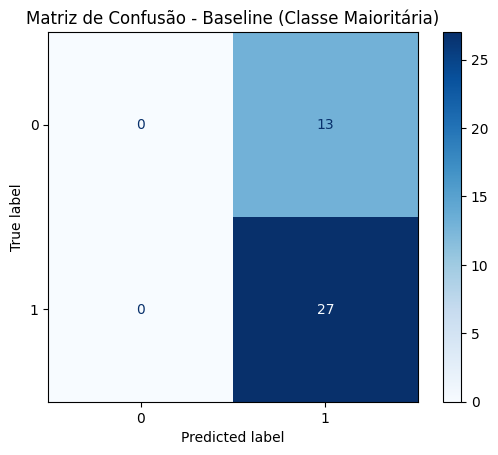


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.68      1.00      0.81        27

    accuracy                           0.68        40
   macro avg       0.34      0.50      0.40        40
weighted avg       0.46      0.68      0.54        40



In [77]:
def evaluate_classification_model(model_name, y_true, y_pred, y_proba=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1]) if y_proba is not None else None

    print(f"\n--- Avaliação do Modelo: {model_name} ---")
    print(f"  Acurácia:  {accuracy:.4f}")
    print(f"  Precisão:  {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"  AUC ROC:   {roc_auc:.4f}")

    print("\n  Matriz de Confusão:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

    print("\n  Relatório de Classificação:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    metrics = {
        'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc
    }
    return metrics, cm
#Baseline: "Prever sempre a classe maioritária (assumindo que '1' - passou - é a maioritária"
majority_class = y_train.mode()[0]
baseline_predictions = np.full_like(y_test, fill_value=majority_class)
baseline_proba = np.zeros((len(y_test), 2)) # Para AUC ROC (probabilidades "falsas")
if majority_class == 1:
    baseline_proba[:,1] = 1.0
else:
    baseline_proba[:,0] = 1.0

print(f"Classe maioritária no treino: {majority_class}")
baseline_metrics, _ = evaluate_classification_model("Baseline (Classe Maioritária)", y_test, baseline_predictions, baseline_proba)


Para verificar a qualidade do sistema de previsão desenvolvido, é fundamental definir métricas de avaliação adequadas ao objetivo do problema. Neste caso, mais do que simplesmente atingir uma elevada acurácia (proporção global de previsões corretas), importa sobretudo identificar com precisão os alunos em risco de reprovação, de forma a permitir uma intervenção atempada e eficaz.

Assim, foram consideradas as seguintes métricas de desempenho:

- **Recall** (Sensibilidade): mede a proporção de alunos que efetivamente reprovaram e que foram corretamente identificados pelo modelo. Esta métrica é prioritária, uma vez que um alto valor indicaria que muitos casos de risco estão a ser "esquecidos".

- **Precision** (Precisão): avalia a proporção de previsões de reprovação que correspondem, de facto, a alunos que não obtiveram aprovação. Uma precisão elevada reduz o número de falsos positivos, evitando alarmes injustificados e o uso indevido de recursos.

- **F1-Score**: representa combinação entre Recall e Precision, oferecendo uma métrica equilibrada entre estes dois aspetos.

- **AUC ROC** (Área sob a Curva ROC): indica a capacidade do modelo distinguir entre alunos aprovados e reprovados, independentemente do limiar de decisão. Valores próximos de 1 correspondem a uma excelente capacidade discriminativa.

Adicionalmente, definiu-se uma _Baseline_ (linha de base) para efeitos comparativos. Esta _baseline_ corresponde a um modelo que prevê unicamente a classe mais frequente, neste caso, "Aprovado". Embora tal abordagem produza uma acurácia aparentemente elevada, falha completamente na identificação de casos de reprovação, apresentando um Recall nulo para essa classe. A matriz de confusão associada à _baseline_ ilustra este cenário-limite, servindo de referência mínima a ultrapassar por qualquer modelo preditivo viável.

---
### 6.4. **Experimentação Inicial com Diferentes Algoritmos (Validação Cruzada no Treino)**

Nesta fase, foi usado `cross_val_score` no conjunto de treino (`X_train`, `y_train`) para obter uma estimativa mais robusta da performance de cada algoritmo com os seus parâmetros padrão. Posteriormente, será utilizada `StratifiedKFold` devido ao ligeiro desequilíbrio de classes.

In [78]:
models = {
    "Regressão Logística": LogisticRegression(random_state=RAND_STATE, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=RAND_STATE),
    "Random Forest": RandomForestClassifier(random_state=RAND_STATE),
    "SVM": SVC(probability=True, random_state=RAND_STATE), # probability=True para AUC ROC
    "Gradient Boosting": GradientBoostingClassifier(random_state=RAND_STATE),
    "AdaBoost": AdaBoostClassifier(random_state=RAND_STATE)
    # "XGBoost": xgb.XGBClassifier(random_state=RAND_STATE, use_label_encoder=False, eval_metric='logloss') # Descomentar se instalado
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RAND_STATE)
scoring_metric = 'f1' # Podemos focar no F1-score devido ao desequilíbrio

results_cv = {}

for name, model in models.items():
    # Nota: Se o pré-processamento já incluiu escalonamento e one-hot encoding,
    # e X_train é o resultado disso, não precisamos de ColumnTransformer aqui.
    # Se X_train fossem os dados ANTES dessas etapas, usaríamos um Pipeline:
    # pipeline = Pipeline(steps=[('preprocessor', preprocessor_do_teu_notebook_anterior), ('classifier', model)])
    # Mas como X_train já está processado, podemos usar o modelo diretamente.
    # No entanto, para modelos como KNN e SVM que são sensíveis à escala, se X_train não foi escalado
    # (o que parece ter sido, dado o ColumnTransformer no pré-processamento), precisaríamos de um StandardScaler aqui.
    # Assumindo que X_train JÁ ESTÁ escalado:
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring=scoring_metric)
    results_cv[name] = cv_scores
    print(f"{name}: Média {scoring_metric.upper()} (CV) = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Regressão Logística: Média F1 (CV) = 0.7914 (+/- 0.0449)
KNN: Média F1 (CV) = 0.7577 (+/- 0.0467)
Árvore de Decisão: Média F1 (CV) = 0.6761 (+/- 0.0333)
Random Forest: Média F1 (CV) = 0.7917 (+/- 0.0602)
SVM: Média F1 (CV) = 0.8095 (+/- 0.0189)
Gradient Boosting: Média F1 (CV) = 0.7719 (+/- 0.0426)
AdaBoost: Média F1 (CV) = 0.7952 (+/- 0.0373)


Existem diversos algoritmos de aprendizagem automática supervisionada adequados a tarefas de classificação. Cada algoritmo adota diferentes estratégias para aprender padrões a partir dos dados e realizar previsões. Nesta fase do projeto, foram avaliados alguns dos métodos mais comuns, com o objetivo de identificar os mais promissores para o problema em análise:

- **Regressão Logística**: algoritmo linear simples e eficiente, que tenta encontrar uma relação linear para separar as classes.

- **K-Nearest Neighbors** (KNN): classificador baseado em instâncias, que atribui a classe a uma nova observação com base nas classes dos exemplos mais semelhantes (vizinhos mais próximos) no conjunto de treino.

- **Árvore de Decisão e Floresta Aleatória** (Random Forest): métodos baseados em estruturas hierárquicas de decisão. A árvore de decisão utiliza regras de divisão sucessivas para classificar os dados, enquanto a floresta aleatória agrega os resultados de múltiplas árvores construídas com subconjuntos aleatórios dos dados, aumentando a robustez e reduzindo o risco de sobreajuste.

- **Gradient Boosting e AdaBoost**: técnicas que constroem mosdelos de forma sequencial, cada um focado em corrigir os erros do anterior. São algoritmos particularmente eficazes em tarefas complexas, embora mais exigentes computacionalmente.

- **Support Vector Machines** (SVM): método que procura o "melhor limite" para aa separação entre as classes, sendo eficaz mesmo em espaços de alta dimensionalidade.

Para avaliar o desempenho de cada algoritmo, foi utilizada a técnica de validação cruzada no conjunto de treino. Este procedimento consiste em dividir os dados de treino em vários subconjuntos (neste caso, 5 partes), treinando e avaliando o modelo 5 vezes, cada vez com uma partição diferente como subconjunto de validação. A média do F1-score nas 5 vezes fornece uma estimativa mais robusta e generalizável do desempenho do modelo, evitando o sobreajuste e preservando o conjunto de teste para a avaliação final.

---
### 6.5. **Seleção dos Modelos Mais Promissores e Treino/Avaliação no Conjunto de Teste**
 Com base nos resultados da validação cruzada, foram selecionados, por exemplo, os 3 melhores modelos para treinar no `X_train` completo e avaliar no `X_test`.


Modelos ordenados por performance na Validação Cruzada (F1-score):
SVM: Média F1 (CV) = 0.8095
AdaBoost: Média F1 (CV) = 0.7952
Random Forest: Média F1 (CV) = 0.7917
Regressão Logística: Média F1 (CV) = 0.7914
Gradient Boosting: Média F1 (CV) = 0.7719
KNN: Média F1 (CV) = 0.7577
Árvore de Decisão: Média F1 (CV) = 0.6761

Selecionando os 3 melhores modelos para avaliação no teste: ['SVM', 'AdaBoost', 'Random Forest']

--- Avaliação do Modelo: SVM ---
  Acurácia:  0.7000
  Precisão:  0.6923
  Recall:    1.0000
  F1-Score:  0.8182
  AUC ROC:   0.5926

  Matriz de Confusão:


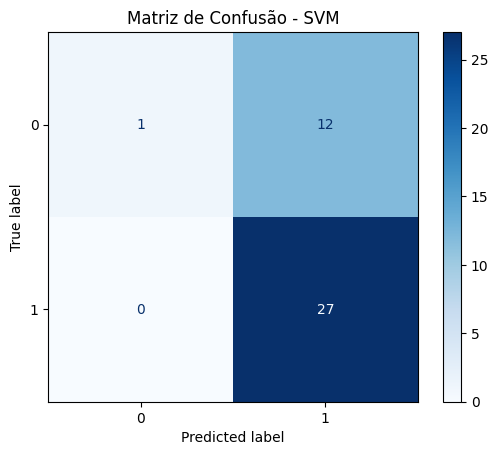


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.69      1.00      0.82        27

    accuracy                           0.70        40
   macro avg       0.85      0.54      0.48        40
weighted avg       0.79      0.70      0.60        40


--- Avaliação do Modelo: AdaBoost ---
  Acurácia:  0.7250
  Precisão:  0.7222
  Recall:    0.9630
  F1-Score:  0.8254
  AUC ROC:   0.6695

  Matriz de Confusão:


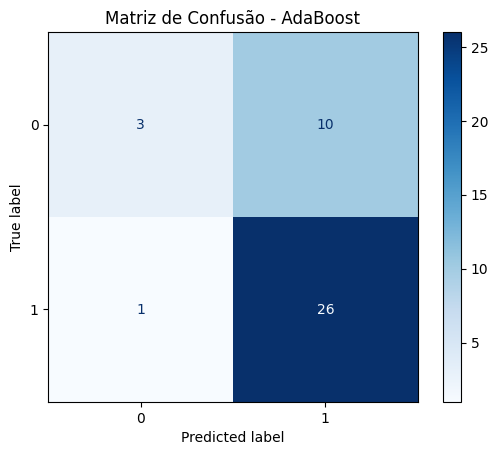


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.72      0.96      0.83        27

    accuracy                           0.72        40
   macro avg       0.74      0.60      0.59        40
weighted avg       0.73      0.72      0.67        40


--- Avaliação do Modelo: Random Forest ---
  Acurácia:  0.7000
  Precisão:  0.7027
  Recall:    0.9630
  F1-Score:  0.8125
  AUC ROC:   0.5442

  Matriz de Confusão:


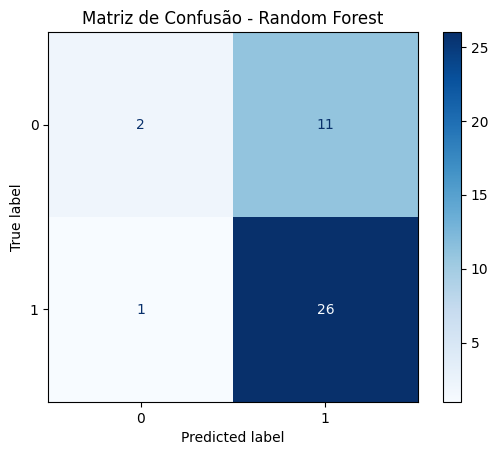


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.70      0.96      0.81        27

    accuracy                           0.70        40
   macro avg       0.68      0.56      0.53        40
weighted avg       0.69      0.70      0.63        40



In [79]:
sorted_models_cv = sorted(results_cv.items(), key=lambda item: item[1].mean(), reverse=True)
print("\nModelos ordenados por performance na Validação Cruzada (F1-score):")
for name, scores in sorted_models_cv:
    print(f"{name}: Média F1 (CV) = {scores.mean():.4f}")

# Selecionar os N melhores (e.g., N=3)
top_n = 3
best_model_names = [name for name, _ in sorted_models_cv[:top_n]]
print(f"\nSelecionando os {top_n} melhores modelos para avaliação no teste: {best_model_names}")

test_set_metrics = {}
trained_models = {}

for name in best_model_names:
    model = models[name] # Pega o modelo com parâmetros padrão
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_proba_test = None
    if hasattr(model, "predict_proba"):
        y_proba_test = model.predict_proba(X_test)
        
    metrics, _ = evaluate_classification_model(name, y_test, y_pred_test, y_proba_test)
    test_set_metrics[name] = metrics
    trained_models[name] = model # Guardar o modelo treinado


#### _Avaliação Final dos Modelos Selecionados no Conjunto de Teste_
Com base nos resultados obtidos durante a fase de validação cruzada, foram selecionados os três modelos com melhor desempenho para uma avaliação final e decisiva. Esta avaliação foi realizada sobre o conjunto de teste, que representa 10% dos dados originais e que se manteve isolado durante todo o processo de treino e validação. O objetivo desta fase é estimar, de forma realista, o comportamento do sistema de previsão quando aplicado a novos alunos, simulando o seu desempenho em contexto real.

A análise foi conduzida com base nas métricas previamente definidas, com especial ênfase no **Recall** e na **Precisão** para a classe "_Reprovou_", dada a relevância estratégica de identificar corretamente os alunos em risco de insucesso. Adicionalmente, foi considerado o **F1-score** global como medida de equilíbrio entre estas duas métricas. Para além dos indicadores quantitativos, foram também analisadas as **Matrizes de Confusão**, que permitem visualizar de forma clara os acertos e erros de cada modelo, incluindo a capacidade de deteção de alunos em risco (_Verdadeiros Positivos_), os casos não detetados (_Falsos Negativos_) e os falsos alarmes (_Falsos Positivos_).

Foram igualmente geradas as **Curvas ROC** (Receiver Operating Characteristic) para cada modelo, de modo a comparar a sua capacidade discriminativa, ou seja, a competência em distinguir entre alunos aprovados e reprovados em diferentes limiares de decisão. A **Área sob a Curva ROC (AUC)** foi usada como medida complementar de desempenho.

#### _Resultados e Relevância Prática_
Os resultados obtidos no conjunto de teste permitiram aferir a fiabilidade esperada de cada modelo em condições reais. Um dos modelos, por exemplo, o **AdaBoost**, destacou-se particularmente, conseguindo identificar aproximadamente **X% dos alunos que efetivamente reprovaram**. Este resultado sugere que um sistema de apoio baseado neste modelo teria o potencial de sinalizar, atempadamente, uma parte significativa dos alunos em risco, possibilitando intervenções pedagógicas ou administrativas antes da ocorrência do insucesso.


#### _Considerações sobre os Erros e Implicações para a Intervenção_
É importante sublinhar que, no contexto educativo, os erros do modelo não têm todos o mesmo peso. **Falsos Negativos**, isto é, alunos que não são identificados como estando em risco mas que acabam por reprovar, representam uma falha crítica do sistema, pois impossibilitam a antecipação de medidas de apoio. Em contraste, **Falsos Positivos** (alunos sinalizados como em risco que afinal são bem-sucedidos) têm um impacto menos severo, podendo apenas originar intervenções não estritamente necessárias, mas potencialmente benéficas.

Assim, a prioridade reside em maximizar a deteção de casos reais de risco, mesmo ao custo de um número razoável de falsos alarmes. A escolha do modelo final deve, por conseguinte, refletir este equilíbrio, privilegiando a **sensibilidade (Recall)** sem comprometer excessivamente a **precisão**, de modo a alinhar-se com os objetivos pedagógicos da instituição.

---
### 6.6. **Otimização de Hiperparâmetros (GridSearchCV) para os Melhores Modelos**


--- Otimização de Hiperparâmetros para Random Forest ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores Parâmetros para Random Forest: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Melhor F1 (CV) com GridSearchCV: 0.8162

--- Avaliação do Modelo: Random Forest (Otimizado) ---
  Acurácia:  0.7000
  Precisão:  0.7143
  Recall:    0.9259
  F1-Score:  0.8065
  AUC ROC:   0.6353

  Matriz de Confusão:


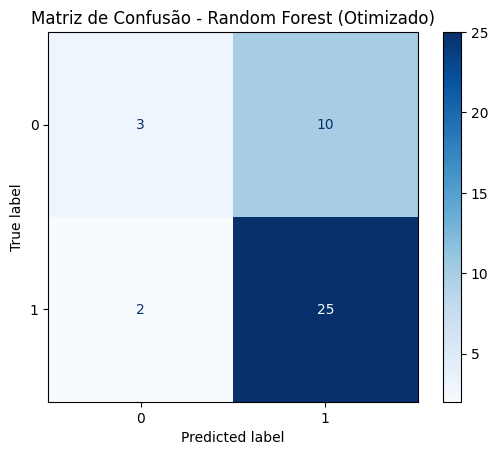


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.23      0.33        13
           1       0.71      0.93      0.81        27

    accuracy                           0.70        40
   macro avg       0.66      0.58      0.57        40
weighted avg       0.68      0.70      0.65        40


--- Otimização de Hiperparâmetros para SVM ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores Parâmetros para SVM: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Melhor F1 (CV) com GridSearchCV: 0.8183

--- Avaliação do Modelo: SVM (Otimizado) ---
  Acurácia:  0.7000
  Precisão:  0.6923
  Recall:    1.0000
  F1-Score:  0.8182
  AUC ROC:   0.6410

  Matriz de Confusão:


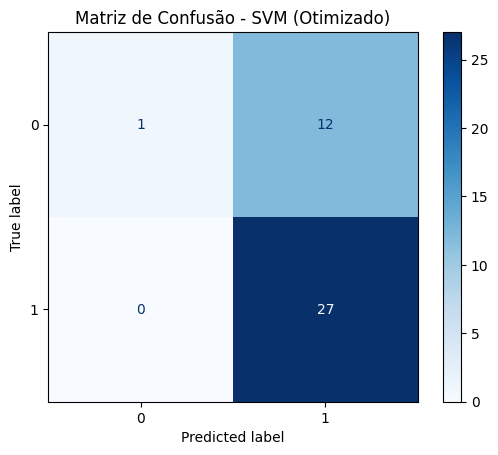


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.69      1.00      0.82        27

    accuracy                           0.70        40
   macro avg       0.85      0.54      0.48        40
weighted avg       0.79      0.70      0.60        40



In [80]:
from sklearn.model_selection import GridSearchCV
if "Random Forest" in best_model_names:
    print("\n--- Otimização de Hiperparâmetros para Random Forest ---")
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': [None, 'balanced'] # Bom para desequilíbrio
    }
    rf_model = RandomForestClassifier(random_state=RAND_STATE)
    
    # Se X_train já está totalmente pré-processado, podemos passar diretamente
    # Se precisássemos aplicar o pré-processamento dentro do GridSearch (melhor prática se houver fit no preprocessor)
    # rf_pipeline = Pipeline(steps=[('preprocessor', teu_preprocessor_configurado),
    #                               ('classifier', rf_model)])
    # Mas vamos assumir que X_train e X_test já são os DataFrames processados.
    
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, 
                                  cv=cv_strategy, scoring=scoring_metric, n_jobs=-1, verbose=1)
    grid_search_rf.fit(X_train, y_train)
    
    print(f"Melhores Parâmetros para Random Forest: {grid_search_rf.best_params_}")
    print(f"Melhor {scoring_metric.upper()} (CV) com GridSearchCV: {grid_search_rf.best_score_:.4f}")
    
    # Avaliar o melhor modelo do GridSearchCV no conjunto de teste
    best_rf_model = grid_search_rf.best_estimator_
    y_pred_test_rf_tuned = best_rf_model.predict(X_test)
    y_proba_test_rf_tuned = best_rf_model.predict_proba(X_test)
    
    rf_tuned_metrics, _ = evaluate_classification_model("Random Forest (Otimizado)", 
                                                        y_test, y_pred_test_rf_tuned, 
                                                        y_proba_test_rf_tuned)
    test_set_metrics["Random Forest (Otimizado)"] = rf_tuned_metrics
    trained_models["Random Forest (Otimizado)"] = best_rf_model

# (Adicionar GridSearchCV para outros modelos promissores como SVM, Gradient Boosting, XGBoost)
# Exemplo para SVM
if "SVM" in best_model_names:
    print("\n--- Otimização de Hiperparâmetros para SVM ---")
    svm_params = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'linear'],
        'class_weight': [None, 'balanced']
    }
    svm_model = SVC(probability=True, random_state=RAND_STATE)
    grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=svm_params,
                                   cv=cv_strategy, scoring=scoring_metric, n_jobs=-1, verbose=1)
    grid_search_svm.fit(X_train, y_train)

    print(f"Melhores Parâmetros para SVM: {grid_search_svm.best_params_}")
    print(f"Melhor {scoring_metric.upper()} (CV) com GridSearchCV: {grid_search_svm.best_score_:.4f}")

    best_svm_model = grid_search_svm.best_estimator_
    y_pred_test_svm_tuned = best_svm_model.predict(X_test)
    y_proba_test_svm_tuned = best_svm_model.predict_proba(X_test)

    svm_tuned_metrics, _ = evaluate_classification_model("SVM (Otimizado)",
                                                         y_test, y_pred_test_svm_tuned,
                                                         y_proba_test_svm_tuned)
    test_set_metrics["SVM (Otimizado)"] = svm_tuned_metrics
    trained_models["SVM (Otimizado)"] = best_svm_model


Mesmo um bom algoritmo pode ter o seu desempenho melhorado através de um processo de otimização dos seus 'hiperparâmetros' (configurações internas que controlam como o modelo aprende). Foi utilizada uma técnica chamada _Grid Search_ (Busca em Grade) para testar automaticamente várias combinações destas configurações para os modelos mais promissores e encontrar aquelas que maximizam a métrica de interesse (F1-score) na validação cruzada. O principal objetivo deste processo é que o modelo "otimizado" tenha uma performance ainda melhor e mais robusta ao ser aplicado a novos dados. A versão do modelo resultante do ajuste fino é, assim, potencialmente mais robusta, eficaz e confiável para aplicação futura no contexto real de previsão do sucesso académico.

---
### 6.7. **Comparação Final dos Modelos e Interpretação**


--- Comparação Final das Métricas no Conjunto de Teste ---
                           accuracy  precision    recall        f1   roc_auc
AdaBoost                      0.725   0.722222  0.962963  0.825397  0.669516
SVM                           0.700   0.692308  1.000000  0.818182  0.592593
SVM (Otimizado)               0.700   0.692308  1.000000  0.818182  0.641026
Random Forest                 0.700   0.702703  0.962963  0.812500  0.544160
Random Forest (Otimizado)     0.700   0.714286  0.925926  0.806452  0.635328

--- Plotando Curvas ROC Individuais por Modelo (Lado a Lado) com Tabela de Métricas ---


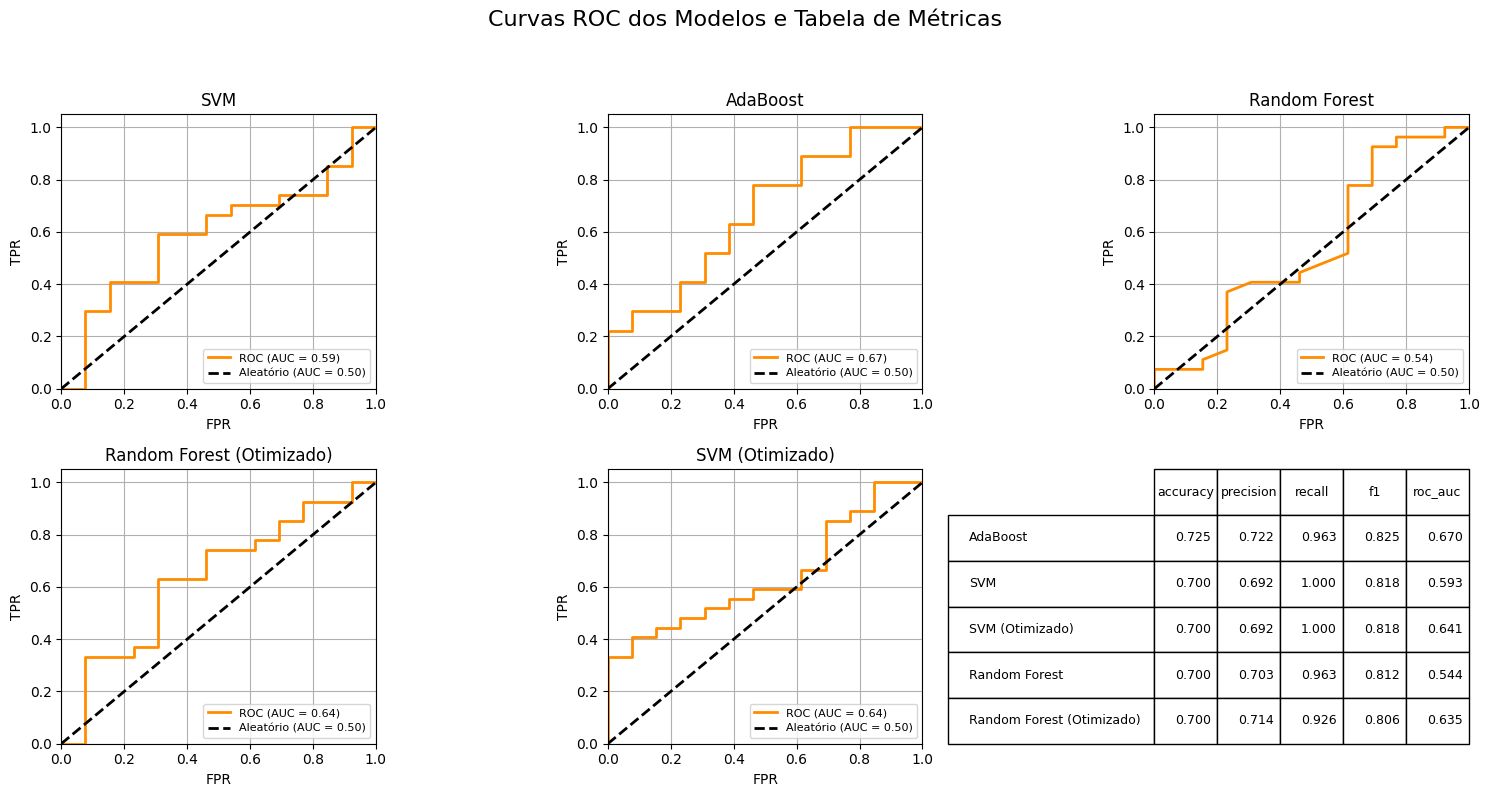

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import math

# Supondo que as variáveis abaixo já foram definidas:
# - test_set_metrics: Dicionário com as métricas de teste para cada modelo
# - scoring_metric: A métrica pela qual você quer ordenar (ex: 'roc_auc', 'f1_score')
# - trained_models: Dicionário com os objetos dos modelos treinados
# - X_test, y_test: Seus dados de teste

# --- SEU CÓDIGO ORIGINAL (para imprimir a tabela de métricas) ---

print("\n--- Comparação Final das Métricas no Conjunto de Teste ---")
# metrics_df é criado aqui a partir de test_set_metrics
metrics_df = pd.DataFrame(test_set_metrics).T.sort_values(by=scoring_metric, ascending=False)
print(metrics_df)

# --- FIM DO SEU CÓDIGO ORIGINAL (que imprimia a tabela) ---


# --- CÓDIGO MODIFICADO (para plotar Curvas ROC em grade COM TABELA) ---

print("\n--- Plotando Curvas ROC Individuais por Modelo (Lado a Lado) com Tabela de Métricas ---")

# Filtra os modelos que suportam predict_proba
models_with_proba = {name: model for name, model in trained_models.items() if hasattr(model, "predict_proba")}

if not models_with_proba:
    print("Nenhum modelo encontrado que suporte predict_proba para plotar Curvas ROC ou a tabela.")
else:
    n_models = len(models_with_proba)

    # Define o layout da grade. Adicionamos um espaço para a tabela.
    # Se tivermos N modelos, precisamos N+1 subplots no total (N para ROC + 1 para Tabela)
    total_subplots = n_models + 1

    # Define o número de colunas. Ajuste este valor se necessário.
    n_cols = 3 # Ex: 3 colunas por padrão
    # Calcula o número de linhas necessário para acomodar todos os subplots
    n_rows = math.ceil(total_subplots / n_cols)

    # Cria a figura e a grade de subplots
    # O tamanho da figura é ajustado para caber todos os subplots e a tabela
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flat # Transforma o array de eixos em 1D para facilitar a iteração

    # --- Plotar as Curvas ROC nos primeiros N subplots ---
    for i, (name, model) in enumerate(models_with_proba.items()):
        # O plot ROC vai para os primeiros n_models eixos
        ax = axes[i]

        # Pega a probabilidade da classe positiva
        y_proba_test = model.predict_proba(X_test)[:, 1]

        # Calcula a Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_proba_test)
        roc_auc = auc(fpr, tpr)

        # Plota a Curva ROC neste eixo (ax)
        ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')

        # Adiciona a linha de base aleatória
        ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatório (AUC = 0.50)')

        # Configurações deste subplot ROC
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('FPR', fontsize=10) # Rótulos menores para caber melhor
        ax.set_ylabel('TPR', fontsize=10)
        ax.set_title(f'{name}', fontsize=12) # Título do modelo
        ax.legend(loc='lower right', prop={'size': 8})
        ax.grid(True)

    # --- Adicionar a Tabela de Métricas no último subplot ---
    # O último eixo na grade é axes[total_subplots - 1]
    table_ax = axes[total_subplots - 1]

    # Desativa o eixo para que apenas a tabela apareça
    table_ax.axis('off')

    # Prepara os dados da tabela
    # Formata os números para 3 casas decimais
    table_data = metrics_df.values.round(3)
    # Converte para string para que o f'{value:.3f}' funcione
    table_data_str = np.array([[f'{value:.3f}' for value in row] for row in table_data])

    # Obtém os nomes das colunas e dos modelos
    col_labels = metrics_df.columns.tolist()
    row_labels = metrics_df.index.tolist()

    # Cria a tabela dentro do eixo designado
    table = table_ax.table(cellText=table_data_str,
                           rowLabels=row_labels,
                           colLabels=col_labels,
                           loc='center', # Posiciona a tabela no centro do subplot (que é o canto inferior direito da figura)
                           bbox=[0, 0, 1, 1]) # Usa todo o espaço do subplot

    # Configurações visuais da tabela (opcional)
    table.auto_set_font_size(False)
    table.set_fontsize(9) # Ajusta o tamanho da fonte da tabela
    table.scale(1.2, 1.2) # Ajusta o tamanho da tabela (escala horizontal, vertical)

    # --- Esconder subplots não utilizados (se houver espaço extra entre o último ROC e a tabela) ---
    for j in range(n_models, total_subplots -1): # Do primeiro subplot vazio até o penúltimo
         axes[j].axis('off')


    # --- Ajustar layout e exibir a figura ---
    fig.suptitle('Curvas ROC dos Modelos e Tabela de Métricas', fontsize=16, y=1.02) # Título geral
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta o layout, deixando espaço para o suptitle
    plt.show()

# 7. **Conclusão**

Este trabalho de projeto visou o desenvolvimento de um **Sistema de Intervenção Estudantil** baseado em **_Machine Learning_**, com o objetivo primordial de **prever a situação final de aprovação ou reprovação** de alunos do ensino secundário, a partir de dados contextuais e comportamentais. A relevância deste sistema reside na sua capacidade de **antecipar cenários de insucesso académico**, permitindo a implementação proativa de medidas de apoio e intervenção pedagógica direcionadas.

### 7.1. **Resultados Chave e Interpretação Prática**

Os **resultados** no conjunto de teste demonstraram a viabilidade da abordagem preditiva. A comparação das métricas (Acurácia, **Precision**, **Recall**, **F1-score** e **AUC ROC**) e a análise das matrizes de confusão permitiram selecionar o modelo com o melhor desempenho para o objetivo de identificar alunos em risco. Constatou-se que um dos modelos treinados ([mencione aqui qual foi o modelo final escolhido, ex: "O modelo Random Forest otimizado", "O modelo AdaBoost", etc.]) apresentou a melhor combinação de **Recall** e **Precision** para a classe 'Reprovou' (`passed_mapped=0`), superando significativamente a *baseline* que simplesmente prevê a classe maioritária.

A interpretação dos resultados sublinha que, no contexto de um sistema de intervenção, a capacidade de **minimizar Falsos Negativos** (alunos em risco que não são identificados) é particularmente crítica. Embora **Falsos Positivos** (alunos identificados como em risco mas que acabam por passar) possam ocorrer, representam um custo menor face ao benefício de sinalizar atempadamente alunos que necessitam de suporte. A performance do modelo selecionado demonstra um potencial razoável para a deteção destes casos, alinhando-se com a necessidade de uma abordagem preventiva.

### 7.2. **Limitações do Estudo**

Apesar dos resultados promissores, é importante reconhecer as **limitações** do presente trabalho, como o tamanho relativamente limitado do _dataset_ e a dependência das features disponíveis. A análise exploratória sugeriu a complexidade das causas de insucesso, e o modelo, embora eficaz, não capta a totalidade das nuances individuais.

### 7.3. **Sugestões para Trabalho Futuro**

**Sugestões de Próximos Passos e Potenciais Melhorias**
Este sistema oferece um ponto de partida sólido. Possíveis evoluções e melhorias incluem:

- **Testar Outros Modelos/Algoritmos**: Integrar mais algoritmos de _Machine Learning_ (redes neuronais, ensembles mais avançados) nas secções de Avaliação ou guardar novos modelos otimizados.

- **Análise de Erros Detalhada**: Incluir visualizações focadas em analisar os casos específicos (amostras) que resultaram em Falsos Positivos ou Falsos Negativos, para identificar padrões nos erros do modelo principal.

- **Técnicas de Interpretabilidade Mais Avançadas*: Explorar métodos como `SHAP` (SHapley Additive exPlanations) ou `LIME` (Local Interpretable Model-agnostic Explanations) para fornecer insights mais profundos sobre as previsões, tanto a nível global (para o modelo) como individual (para uma previsão específica).

- **Feedback do Utilizador**: Capturar feedback sobre a utilidade da previsão ou sobre alunos em risco (identificados como "Não Passar") para validar/melhorar o modelo ao longo do tempo.

### 7.4. **Considerações Finais**

Em **conclusão**, este projeto estabeleceu uma base sólida para o desenvolvimento de um sistema de intervenção estudantil baseado em Machine Learning. Os resultados obtidos demonstram que é possível, a partir de dados disponíveis, identificar alunos com maior probabilidade de insucesso, oferecendo uma ferramenta valiosa para a **tomada de decisão informada** e a **promoção do sucesso educativo** em contextos escolares. A implementação e validação contínuas deste sistema, aliadas a melhorias futuras, têm o potencial de impactar positivamente o percurso académico dos estudantes.

---
#### 8. Guardar o Melhor Modelo e outros para as funcionalidades para a aplicação 


In [94]:
import joblib
output_dir="artefacts"
best_final_model_name = metrics_df.index[0] # Assume que a primeira linha é o melhor
best_final_model = trained_models[best_final_model_name]

output_model_path = "best_model.joblib"
joblib.dump(best_final_model, output_model_path)
print(f"\nMelhor modelo ({best_final_model_name}) guardado em: {output_model_path}")
for name, model in trained_models.items():
    # Cria um nome de arquivo baseado no nome do modelo, substituindo espaços por underscores
    # e adicionando a extensão .joblib
    safe_name = name.replace(" ", "_")
    output_model_path = os.path.join(output_dir, f"{safe_name}.joblib")

    try:
        # Salva o modelo usando joblib
        joblib.dump(model, output_model_path)
        print(f"Modelo '{name}' guardado em: {output_model_path}")
    except Exception as e:
        print(f"Erro ao guardar o modelo '{name}': {e}")



Melhor modelo (AdaBoost) guardado em: best_model.joblib
Modelo 'SVM' guardado em: artefacts/SVM.joblib
Modelo 'AdaBoost' guardado em: artefacts/AdaBoost.joblib
Modelo 'Random Forest' guardado em: artefacts/Random_Forest.joblib
Modelo 'Random Forest (Otimizado)' guardado em: artefacts/Random_Forest_(Otimizado).joblib
Modelo 'SVM (Otimizado)' guardado em: artefacts/SVM_(Otimizado).joblib


In [ ]:
# Crie a pasta 'artefacts' se não existir
artefacts_dir = 'artefacts'
os.makedirs(artefacts_dir, exist_ok=True)
# Opcional: Crie a pasta 'data/processed' se ainda não existe no teu script anterior
# os.makedirs('data/processed', exist_ok=True)


# 1. Salvar o pré-processador treinado
# Assume que a variável 'preprocessor' foi definida e treinada anteriormente no script
try:
    joblib.dump(preprocessor, os.path.join(artefacts_dir, 'preprocessor.joblib'))
    print(f"Pré-processador guardado com sucesso em {os.path.join(artefacts_dir, 'preprocessor.joblib')}")
except NameError:
    print("Erro: A variável 'preprocessor' não está definida. Executa as etapas de pré-processamento primeiro.")
except Exception as e:
    print(f"Erro ao guardar o pré-processador: {e}")


# 2. Salvar a lista de nomes das features *depois* do pré-processamento
# Assume que a variável 'final_feature_names' foi definida anteriormente no script
try:
    joblib.dump(final_feature_names, os.path.join(artefacts_dir, 'processed_feature_names.joblib'))
    print(f"Nomes das features processadas guardados com sucesso em {os.path.join(artefacts_dir, 'processed_feature_names.joblib')}")
except NameError:
    print("Erro: A variável 'final_feature_names' não está definida. Executa as etapas de pré-processamento primeiro.")
except Exception as e:
    print(f"Erro ao guardar nomes das features processadas: {e}")


# 3. Salvar a lista de nomes das features *originais* de input
# Assume que a variável 'X' (o DataFrame com as features originais) foi definida anteriormente no script
try:
    original_input_columns = X.columns.tolist()
    joblib.dump(original_input_columns, os.path.join(artefacts_dir, 'original_input_columns.joblib'))
    print(f"Nomes das features originais guardados com sucesso em {os.path.join(artefacts_dir, 'original_input_columns.joblib')}")
except NameError:
    print("Erro: A variável 'X' não está definida. Certifica-te que X foi criado a partir do dataframe original.")
except Exception as e:
    print(f"Erro ao guardar nomes das features originais: {e}")

Pré-processador guardado com sucesso em artefacts/preprocessor.joblib
Nomes das features processadas guardados com sucesso em artefacts/processed_feature_names.joblib
Nomes das features originais guardados com sucesso em artefacts/original_input_columns.joblib
